# Business Case : The newspaper data

# In order to investigate the feasibility of starting a Sunday edition for a large 
# metropolitan newspaper, information was obtained from a sample of 34 newspapers concerning 
# their daily and Sunday circulations (in thousands)

In [2]:

#import pandas 
import pandas as pd


In [3]:
#read the csv file using .read_csv() function 
data = pd.read_csv("NewspaperData.csv")

#check the snapshot of data using .head() function
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [4]:
# check the information about the data and the datatypes of respective columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


## correlation 


In [5]:

data.corr()      #correlation matrix

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


/home/aparna/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily', ylabel='Density'>

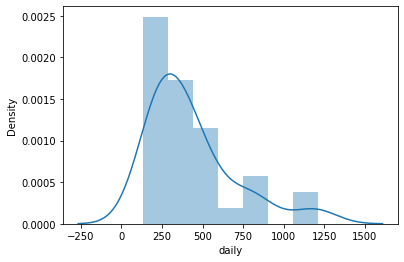

In [6]:
#plotting a distribution plot using seaborn library

import seaborn as sn
sn.distplot(data.daily)

In [7]:
data.describe()   #checking the statistical summary of the data

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


/home/aparna/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sunday', ylabel='Density'>

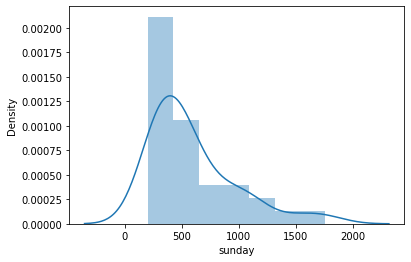

In [8]:
sn.distplot(data.sunday)   

## Fitting a Linear Regression Model

In [9]:
!pip install statsmodels

In [10]:
#using Ordinary least square method to create our model
# for OLS method we need .ols() which is present in statsmodels.formula.api library 



import statsmodels.formula.api as smf    

#create model
model = smf.ols("sunday~daily",data = data).fit()

#check the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           6.02e-19
Time:                        19:56:11   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='daily', ylabel='sunday'>

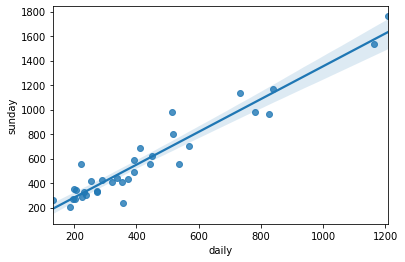

In [11]:
#plotting regression plot using .regplot()

sn.regplot(x = 'daily',y = "sunday",data = data)

In [12]:
#coeffs 
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [13]:
# t and p values 
print(model.tvalues ,"\n",model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [14]:
# R squared values  
model.rsquared , model.rsquared_adj

(0.9180596895873295, 0.9154990548869336)

## Predict for new datapoint

In [15]:
newdata = pd.Series([300,450])


In [16]:
data_pred = pd.DataFrame(newdata,columns = ["daily"])


In [17]:
model.predict(data_pred)

0    415.750057
1    616.707271
dtype: float64